In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255.0
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

pca = PCA()
x_train_pca = pca.fit_transform(x_train_flat)

x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)

x_test_pca = pca.transform(x_test_flat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed whe

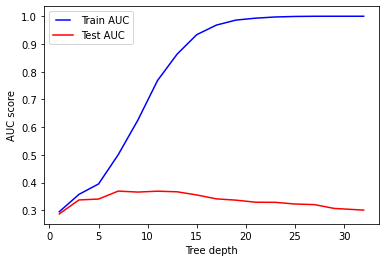

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
"""
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print('random forest with 100 trees:' + random_forest_score)

rf = RandomForestClassifier(n_estimators = 128, max_depth=10, random_state=0)
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print('random forest with 128 trees:' + random_forest_score)

rf = RandomForestClassifier(n_estimators = 64, max_depth=10, random_state=0)
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print('random forest with 64 trees:' + random_forest_score)
"""

from sklearn import metrics
max_depths = np.linspace(1, 32, 16, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train_pca, y_train)
   train_pred = rf.predict(x_train_pca)
   roc_auc = accuracy_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_test_pred = rf.predict(x_test_pca)
   roc_auc = accuracy_score(y_test, y_test_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

max_trees = np.linspace(64,128,9,endpoint=True).astype(int)
train_results = []
test_results = []
for max_tree in max_trees:
   rf = RandomForestClassifier(n_estimators = max_tree, n_jobs=-1)
   rf.fit(x_train_pca, y_train)
   train_pred = rf.predict(x_train_pca)
   roc_auc = accuracy_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_test_pred = rf.predict(x_test_pca)
   roc_auc = accuracy_score(y_test, y_test_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_trees, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_trees, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree numbers")
plt.show()